#Scrapping Δεδομένων από cnn με tag "καρολάιν"
Στο παρών notebook:
α) διαδικασία scrapping
β) ανάλυση κειμένου για πιο συχνές λέξεις
γ) γράφιμα με πιο συχνές λέξεις και wordcloud
δ) count vectorizer and cosine similarity
ε) heatmap

In [ ]:

import requests
from bs4 import BeautifulSoup
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import numpy as np
pd.set_option('max_colwidth', None)

In [ ]:
def get_news_agg_page(page):
  req = requests.get(f'https://www.cnn.gr/tag/karolain?page={page}')
  html = req.content
  soup = BeautifulSoup(html, 'html.parser')
  
  return soup

In [ ]:
pc = 1
urls = []
while(len(urls) < 100):
  arts = get_news_agg_page(pc).find_all('div', attrs={'class': 'gtr'})
  pc += 1
  for art in arts:
    a = art.find('a')
    if a: 
      url = a.attrs.get('href', False)
      if url:
        urls.append(url)


print(len(urls))

101


In [ ]:
len(np.unique(urls))

urls

['/ellada/story/272586/ti-apanta-i-el-as-se-dimosieymata-peri-metaforas-narkotikon-apo-ton-anagnostopoylo',
 '/ellada/story/272473/vretaniko-dimosieyma-vomva-gia-ta-glyka-nera-mplegmenos-se-kartel-narkotikon-o-pilotos',
 '/ellada/story/272231/dikigoros-oikogeneias-karolain-an-den-aposyrthoyn-amesos-ta-kanalia-tha-katatheso-asfalistika-metra',
 '/ellada/story/272187/glyka-nera-anakoyfisi-gia-tin-epimeleia-tis-lydias-kai-oi-diapseyseis-toy-mpampi-apo-ti-fylaki',
 '/ellada/story/272052/glyka-nera-h-mitera-toy-syzygoktonoy-paradidei-tin-mikri-lydia-sti-mitera-tis-karolain',
 '/ellada/story/272037/glyka-nera-dikigoros-syzygoktonoy-se-30-meres-i-oristiki-apofasi-gia-tin-goniki-merimna-tis-lydias',
 '/ellada/story/272031/glyka-nera-pateras-karolain-tha-toy-espaga-to-kefali-leei-gia-ton-mpampi-anagnostopoylo',
 '/ellada/story/271961/katapeltis-i-eisaggelia-anilikon-kata-toy-syzyktonoy-anikanos-na-analavei-tin-anatrofi-tis-lydias',
 '/ellada/story/271905/glyka-nera-stin-oikogeneia-tis-karolain-

In [ ]:
def get_art_page(art_url):
  req = requests.get(f'https://www.cnn.gr' + art_url)
  html = req.content
  soup = BeautifulSoup(html, 'html.parser')
  
  return soup

In [ ]:
dataset = []
for url in urls:
  art = get_art_page(url)
  header = art.find('h1').get_text()
  date = art.find('time').get_text()
  content = art.find('div', attrs={'class': ['main-content', 'story-content']}).get_text()
  dataset.append({'header': header, 'date': date, 'content': content})

In [ ]:
df = pd.DataFrame(dataset)
df.head(5)

header  ...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [ ]:
df['date'] = df['date'].str.strip()
df['content'] = df['content'].str.strip()
df.head(5)

header  ...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [ ]:
map_date = {
    'Μαϊος': 11,
    'Ιουνίου': 6,
    'Ιουλίου': 7,
}

def construct_date(string):
  l = string.split()[1:4]
  l[1] = map_date[l[1]]

  return '/'.join([str(i) for i in l])

df['date'] = df['date'].apply(lambda string: construct_date(string))
df.head(1)

,header,date,content
0,Γλυκά Νερά: Τι απαντά η ΕΛ.ΑΣ. στις αναφορές που εμπλέκουν τον συζυγοκτόνο με διακίνηση ναρκωτικών,03/7/2021,"Για «μυθοπλασίες» κάνει λόγο ο εκπρόσωπος Τύπου της Ελληνικής Αστυνομίας σχετικά με τα δημοσιεύματα βρετανικών μέσων ενημέρωσης που κάνουν λόγο για παράνομες δραστηριότητες του δολοφόνου της Καρολάιν, Μπάμπη Αναγνωστόπουλου. \n\n\n\n\n\nΣυγκεκριμένα, η Mirror ανέφερε πως η ΕΛ.ΑΣ. υποψιάστηκε ότι ο πιλότος σκότωσε τη σύζυγό του αφού εκείνη ανακάλυψε ότι χρησιμοποιούσε το ελικόπτερό του για να μεταφέρει ναρκωτικά.«Οι μυθοπλασίες δεν αφορούν το κράτος» είπε στην ΕΡΤ ο Απόστολος Σκρέκας το πρωί του Σαββάτου και συνέχισε:\n\n\nΔΙΑΒΑΣΤΕ ΕΠΙΣΗΣ \n\n\n\n\n\t\t\t\tΑποκλειστικό: Οι διάλογοι των «Φαντομάδων» της Μυκόνου που εισέβαλαν σε 40 σπίτια του νησιού\t\t\t\n\n\n\n\n\n\n\n\n\t\t\t\tΠέθανε η 7χρονη Αναστασία, ανιψιά της Έρικκας Πρεζεράκου, μετά από «μάχη» με τον καρκίνο\t\t\t\n\n\n\n\n«Όταν υπάρχουν στοιχεία, αξιολογούνται από τις δικαστικές Αρχές που ξέρουν να κάνουν εξαιρετικά τη δουλειά τους».\n\n\nΣυμπλήρωσε πως η αστυνομία είναι «εδώ και σε συνεργασία μαζί τους θα διερευνήσει όλα τα ενδεχόμενα».Ερωτώμενος εάν διερευνάται αυτό το σενάριο, τόνισε πως «οι έρευνες δεν είναι αντικείμενο συζήτησης στον αέρα».\n\n\nΠαράλληλα, ο καθ' ομολογίαν δολοφόνος, μέσα από τις φυλακές Κορυδαλλού, απάντησε στον ΑΝΤ1, μέσω του δικηγόρου του, για όσα ισχυρίζονται μέσα ενημέρωσης, που έχουν παγκόσμια απήχηση.Όπως λέει ο Μπάμπης Αναγνωστόπουλος:«η θέση μου είναι πάγια. Αρνούμαι όσα γράφονται για μένα».Το δημοσίευμα της MirrorΠληροφορίες, σύμφωνα με τις οποίες η αστυνομία ερευνά την πιθανότητα η Καρολάιν Κράουτς να ανακάλυψε παράνομη δραστηριότητα του συζύγου της, γεγονός που οδήγησε τον Μπάμπη Αναγνωστόπουλο να την σκοτώσει, επικαλείται η βρετανική εφημερίδα Mirror.Η γυναικοκτονία στα Γλυκά Νερά με θύμα την 20χρονη βρετανικής καταγωγής Καρολάιν Κράους και καθ' ομολογίαν θύτη τον σύζυγό της εξακολουθεί να απασχολεί τον βρετανικό τύπο, ο οποίος από την πρώτη στιγμή κάλυπτε την υπόθεση με εκτενή ρεπορτάζ.Η εφημερίδα Mirror επανέρχεται επικαλούμενη πληροφορίες σύμφωνα με τις οποίες η ελληνική αστυνομία να φοβάται ότι ο Μπάμπης Αναγνωστόπολους τη σκότωσε προκειμένου «να της κλείσει το στόμα» όταν η νεαρή μητέρα ανακάλυψε ότι χρησιμοποιούσε το ελικόπτερο του για να μεταφέρει ναρκωτικά.Αναφέρει ακόμη, πως αυτή τη στιγμή ερευνώνται τα οικονομικά του μετά από υποψίες που κίνησε ο τρόπος ζωής του.Η πρόσφατη αγορά ενός οικοπέδου αξίας 170.000 ευρώ (σύμφωνα με τη Mirror) αλλά και οι πολυτελείς διακοπές, όπως το πρόσφατο ταξίδι στο Ντουμπάι, φαίνεται να προβληματίζουν τους αξιωματικούς της αστυνομίας που πιστεύουν ότι μπορεί να έχουν πληρωθεί μέσω της εμπλοκής του με ναρκωτικά.Πηγή αποκάλυψε ότι το τελευταίο διάστημα ο πιλότος παρακολουθούσε ασφυκτικά τη σύζυγό του και είχε μάλιστα τοποθετήσει μία εφαρμογή εντοπισμού στο κινητό της, σύμφωνα με τη Sun.Η πηγή πρόσθεσε ότι την ακολουθούσε ακόμη και σε θεραπευτικές συνεδρίες επειδή να φοβόταν μην προβεί σε αποκαλύψεις.«Ο τρόπος που δολοφονήθηκε υποδηλώνει ότι ήθελε να της κλείσει το στόμα κυριολεκτικά και συμβολικά», αναφέρει η πηγή στο δημοσίευμα.Ο μπαμπάς του θύματος, Ντέιβιντ Κράουτς είπε στην εφημερίδα ότι η κόρη του είχε ισχυρές αξίες και θα είχε απειλήσει να φύγει από τον σύζυγό της αν είχε ανακαλύψει μια ενδεχόμενη εμπλοκή με ναρκωτικά."


Φτιάχνω τα δεδομένα μου, θέλω να έχω: ημερομηνία, τίτλο, περιεχόμενο και πόσες λέξεις έχει το κάθε αρθρο

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df.head(1)

,header,date,content
0,Γλυκά Νερά: Τι απαντά η ΕΛ.ΑΣ. στις αναφορές που εμπλέκουν τον συζυγοκτόνο με διακίνηση ναρκωτικών,2021-03-07,"Για «μυθοπλασίες» κάνει λόγο ο εκπρόσωπος Τύπου της Ελληνικής Αστυνομίας σχετικά με τα δημοσιεύματα βρετανικών μέσων ενημέρωσης που κάνουν λόγο για παράνομες δραστηριότητες του δολοφόνου της Καρολάιν, Μπάμπη Αναγνωστόπουλου. \n\n\n\n\n\nΣυγκεκριμένα, η Mirror ανέφερε πως η ΕΛ.ΑΣ. υποψιάστηκε ότι ο πιλότος σκότωσε τη σύζυγό του αφού εκείνη ανακάλυψε ότι χρησιμοποιούσε το ελικόπτερό του για να μεταφέρει ναρκωτικά.«Οι μυθοπλασίες δεν αφορούν το κράτος» είπε στην ΕΡΤ ο Απόστολος Σκρέκας το πρωί του Σαββάτου και συνέχισε:\n\n\nΔΙΑΒΑΣΤΕ ΕΠΙΣΗΣ \n\n\n\n\n\t\t\t\tΑποκλειστικό: Οι διάλογοι των «Φαντομάδων» της Μυκόνου που εισέβαλαν σε 40 σπίτια του νησιού\t\t\t\n\n\n\n\n\n\n\n\n\t\t\t\tΠέθανε η 7χρονη Αναστασία, ανιψιά της Έρικκας Πρεζεράκου, μετά από «μάχη» με τον καρκίνο\t\t\t\n\n\n\n\n«Όταν υπάρχουν στοιχεία, αξιολογούνται από τις δικαστικές Αρχές που ξέρουν να κάνουν εξαιρετικά τη δουλειά τους».\n\n\nΣυμπλήρωσε πως η αστυνομία είναι «εδώ και σε συνεργασία μαζί τους θα διερευνήσει όλα τα ενδεχόμενα».Ερωτώμενος εάν διερευνάται αυτό το σενάριο, τόνισε πως «οι έρευνες δεν είναι αντικείμενο συζήτησης στον αέρα».\n\n\nΠαράλληλα, ο καθ' ομολογίαν δολοφόνος, μέσα από τις φυλακές Κορυδαλλού, απάντησε στον ΑΝΤ1, μέσω του δικηγόρου του, για όσα ισχυρίζονται μέσα ενημέρωσης, που έχουν παγκόσμια απήχηση.Όπως λέει ο Μπάμπης Αναγνωστόπουλος:«η θέση μου είναι πάγια. Αρνούμαι όσα γράφονται για μένα».Το δημοσίευμα της MirrorΠληροφορίες, σύμφωνα με τις οποίες η αστυνομία ερευνά την πιθανότητα η Καρολάιν Κράουτς να ανακάλυψε παράνομη δραστηριότητα του συζύγου της, γεγονός που οδήγησε τον Μπάμπη Αναγνωστόπουλο να την σκοτώσει, επικαλείται η βρετανική εφημερίδα Mirror.Η γυναικοκτονία στα Γλυκά Νερά με θύμα την 20χρονη βρετανικής καταγωγής Καρολάιν Κράους και καθ' ομολογίαν θύτη τον σύζυγό της εξακολουθεί να απασχολεί τον βρετανικό τύπο, ο οποίος από την πρώτη στιγμή κάλυπτε την υπόθεση με εκτενή ρεπορτάζ.Η εφημερίδα Mirror επανέρχεται επικαλούμενη πληροφορίες σύμφωνα με τις οποίες η ελληνική αστυνομία να φοβάται ότι ο Μπάμπης Αναγνωστόπολους τη σκότωσε προκειμένου «να της κλείσει το στόμα» όταν η νεαρή μητέρα ανακάλυψε ότι χρησιμοποιούσε το ελικόπτερο του για να μεταφέρει ναρκωτικά.Αναφέρει ακόμη, πως αυτή τη στιγμή ερευνώνται τα οικονομικά του μετά από υποψίες που κίνησε ο τρόπος ζωής του.Η πρόσφατη αγορά ενός οικοπέδου αξίας 170.000 ευρώ (σύμφωνα με τη Mirror) αλλά και οι πολυτελείς διακοπές, όπως το πρόσφατο ταξίδι στο Ντουμπάι, φαίνεται να προβληματίζουν τους αξιωματικούς της αστυνομίας που πιστεύουν ότι μπορεί να έχουν πληρωθεί μέσω της εμπλοκής του με ναρκωτικά.Πηγή αποκάλυψε ότι το τελευταίο διάστημα ο πιλότος παρακολουθούσε ασφυκτικά τη σύζυγό του και είχε μάλιστα τοποθετήσει μία εφαρμογή εντοπισμού στο κινητό της, σύμφωνα με τη Sun.Η πηγή πρόσθεσε ότι την ακολουθούσε ακόμη και σε θεραπευτικές συνεδρίες επειδή να φοβόταν μην προβεί σε αποκαλύψεις.«Ο τρόπος που δολοφονήθηκε υποδηλώνει ότι ήθελε να της κλείσει το στόμα κυριολεκτικά και συμβολικά», αναφέρει η πηγή στο δημοσίευμα.Ο μπαμπάς του θύματος, Ντέιβιντ Κράουτς είπε στην εφημερίδα ότι η κόρη του είχε ισχυρές αξίες και θα είχε απειλήσει να φύγει από τον σύζυγό της αν είχε ανακαλύψει μια ενδεχόμενη εμπλοκή με ναρκωτικά."


In [ ]:
df.dtypes

header             object
date       datetime64[ns]
content            object
dtype: object

In [ ]:
df['content'] = df['content'].apply(lambda text: ' '.join([word for word in text.split()]))
df.head()

,header,date,content
0,Γλυκά Νερά: Τι απαντά η ΕΛ.ΑΣ. στις αναφορές που εμπλέκουν τον συζυγοκτόνο με διακίνηση ναρκωτικών,2021-03-07,"Για «μυθοπλασίες» κάνει λόγο ο εκπρόσωπος Τύπου της Ελληνικής Αστυνομίας σχετικά με τα δημοσιεύματα βρετανικών μέσων ενημέρωσης που κάνουν λόγο για παράνομες δραστηριότητες του δολοφόνου της Καρολάιν, Μπάμπη Αναγνωστόπουλου. Συγκεκριμένα, η Mirror ανέφερε πως η ΕΛ.ΑΣ. υποψιάστηκε ότι ο πιλότος σκότωσε τη σύζυγό του αφού εκείνη ανακάλυψε ότι χρησιμοποιούσε το ελικόπτερό του για να μεταφέρει ναρκωτικά.«Οι μυθοπλασίες δεν αφορούν το κράτος» είπε στην ΕΡΤ ο Απόστολος Σκρέκας το πρωί του Σαββάτου και συνέχισε: ΔΙΑΒΑΣΤΕ ΕΠΙΣΗΣ Αποκλειστικό: Οι διάλογοι των «Φαντομάδων» της Μυκόνου που εισέβαλαν σε 40 σπίτια του νησιού Πέθανε η 7χρονη Αναστασία, ανιψιά της Έρικκας Πρεζεράκου, μετά από «μάχη» με τον καρκίνο «Όταν υπάρχουν στοιχεία, αξιολογούνται από τις δικαστικές Αρχές που ξέρουν να κάνουν εξαιρετικά τη δουλειά τους». Συμπλήρωσε πως η αστυνομία είναι «εδώ και σε συνεργασία μαζί τους θα διερευνήσει όλα τα ενδεχόμενα».Ερωτώμενος εάν διερευνάται αυτό το σενάριο, τόνισε πως «οι έρευνες δεν είναι αντικείμενο συζήτησης στον αέρα». Παράλληλα, ο καθ' ομολογίαν δολοφόνος, μέσα από τις φυλακές Κορυδαλλού, απάντησε στον ΑΝΤ1, μέσω του δικηγόρου του, για όσα ισχυρίζονται μέσα ενημέρωσης, που έχουν παγκόσμια απήχηση.Όπως λέει ο Μπάμπης Αναγνωστόπουλος:«η θέση μου είναι πάγια. Αρνούμαι όσα γράφονται για μένα».Το δημοσίευμα της MirrorΠληροφορίες, σύμφωνα με τις οποίες η αστυνομία ερευνά την πιθανότητα η Καρολάιν Κράουτς να ανακάλυψε παράνομη δραστηριότητα του συζύγου της, γεγονός που οδήγησε τον Μπάμπη Αναγνωστόπουλο να την σκοτώσει, επικαλείται η βρετανική εφημερίδα Mirror.Η γυναικοκτονία στα Γλυκά Νερά με θύμα την 20χρονη βρετανικής καταγωγής Καρολάιν Κράους και καθ' ομολογίαν θύτη τον σύζυγό της εξακολουθεί να απασχολεί τον βρετανικό τύπο, ο οποίος από την πρώτη στιγμή κάλυπτε την υπόθεση με εκτενή ρεπορτάζ.Η εφημερίδα Mirror επανέρχεται επικαλούμενη πληροφορίες σύμφωνα με τις οποίες η ελληνική αστυνομία να φοβάται ότι ο Μπάμπης Αναγνωστόπολους τη σκότωσε προκειμένου «να της κλείσει το στόμα» όταν η νεαρή μητέρα ανακάλυψε ότι χρησιμοποιούσε το ελικόπτερο του για να μεταφέρει ναρκωτικά.Αναφέρει ακόμη, πως αυτή τη στιγμή ερευνώνται τα οικονομικά του μετά από υποψίες που κίνησε ο τρόπος ζωής του.Η πρόσφατη αγορά ενός οικοπέδου αξίας 170.000 ευρώ (σύμφωνα με τη Mirror) αλλά και οι πολυτελείς διακοπές, όπως το πρόσφατο ταξίδι στο Ντουμπάι, φαίνεται να προβληματίζουν τους αξιωματικούς της αστυνομίας που πιστεύουν ότι μπορεί να έχουν πληρωθεί μέσω της εμπλοκής του με ναρκωτικά.Πηγή αποκάλυψε ότι το τελευταίο διάστημα ο πιλότος παρακολουθούσε ασφυκτικά τη σύζυγό του και είχε μάλιστα τοποθετήσει μία εφαρμογή εντοπισμού στο κινητό της, σύμφωνα με τη Sun.Η πηγή πρόσθεσε ότι την ακολουθούσε ακόμη και σε θεραπευτικές συνεδρίες επειδή να φοβόταν μην προβεί σε αποκαλύψεις.«Ο τρόπος που δολοφονήθηκε υποδηλώνει ότι ήθελε να της κλείσει το στόμα κυριολεκτικά και συμβολικά», αναφέρει η πηγή στο δημοσίευμα.Ο μπαμπάς του θύματος, Ντέιβιντ Κράουτς είπε στην εφημερίδα ότι η κόρη του είχε ισχυρές αξίες και θα είχε απειλήσει να φύγει από τον σύζυγό της αν είχε ανακαλύψει μια ενδεχόμενη εμπλοκή με ναρκωτικά."
1,Βρετανικό δημοσίευμα «βόμβα»: Ο πιλότος μετέφερε ναρκωτικά και το έμαθε η Καρολάιν;,2021-02-07,"Πληροφορίες, σύμφωνα με τις οποίες η αστυνομία ερευνά την πιθανότητα η Καρολάιν Κράουτς να ανακάλυψε παράνομη δραστηριότητα του συζύγου της, γεγονός που οδήγησε τον Μπάμπη Αναγνωστόπουλο να την σκοτώσει, επικαλείται η βρετανική εφημερίδα Mirror. Η γυναικοκτονία στα Γλυκά Νερά με θύμα την 20χρονη βρετανικής καταγωγής Καρολάιν Κράους και καθ' ομολογίαν θύτη τον σύζυγό της εξακολουθεί να απασχολεί τον βρετανικό τύπο, ο οποίος από την πρώτη στιγμή κάλυπτε την υπόθεση με εκτενή ρεπορτάζ.Σήμερα η εφημερίδα Mirror επανέρχεται επικαλούμενη πληροφορίες σύμφωνα με τις οποίες η ελληνική αστυνομία να φοβάται ότι ο Μπάμπης Αναγνωστόπολους τη σκότωσε π

In [ ]:
df['ttl_words'] = df['content'].apply(lambda text: len(text.split()))
df.head()

,header,date,content,ttl_words
0,Γλυκά Νερά: Τι απαντά η ΕΛ.ΑΣ. στις αναφορές που εμπλέκουν τον συζυγοκτόνο με διακίνηση ναρκωτικών,2021-03-07,"Για «μυθοπλασίες» κάνει λόγο ο εκπρόσωπος Τύπου της Ελληνικής Αστυνομίας σχετικά με τα δημοσιεύματα βρετανικών μέσων ενημέρωσης που κάνουν λόγο για παράνομες δραστηριότητες του δολοφόνου της Καρολάιν, Μπάμπη Αναγνωστόπουλου. Συγκεκριμένα, η Mirror ανέφερε πως η ΕΛ.ΑΣ. υποψιάστηκε ότι ο πιλότος σκότωσε τη σύζυγό του αφού εκείνη ανακάλυψε ότι χρησιμοποιούσε το ελικόπτερό του για να μεταφέρει ναρκωτικά.«Οι μυθοπλασίες δεν αφορούν το κράτος» είπε στην ΕΡΤ ο Απόστολος Σκρέκας το πρωί του Σαββάτου και συνέχισε: ΔΙΑΒΑΣΤΕ ΕΠΙΣΗΣ Αποκλειστικό: Οι διάλογοι των «Φαντομάδων» της Μυκόνου που εισέβαλαν σε 40 σπίτια του νησιού Πέθανε η 7χρονη Αναστασία, ανιψιά της Έρικκας Πρεζεράκου, μετά από «μάχη» με τον καρκίνο «Όταν υπάρχουν στοιχεία, αξιολογούνται από τις δικαστικές Αρχές που ξέρουν να κάνουν εξαιρετικά τη δουλειά τους». Συμπλήρωσε πως η αστυνομία είναι «εδώ και σε συνεργασία μαζί τους θα διερευνήσει όλα τα ενδεχόμενα».Ερωτώμενος εάν διερευνάται αυτό το σενάριο, τόνισε πως «οι έρευνες δεν είναι αντικείμενο συζήτησης στον αέρα». Παράλληλα, ο καθ' ομολογίαν δολοφόνος, μέσα από τις φυλακές Κορυδαλλού, απάντησε στον ΑΝΤ1, μέσω του δικηγόρου του, για όσα ισχυρίζονται μέσα ενημέρωσης, που έχουν παγκόσμια απήχηση.Όπως λέει ο Μπάμπης Αναγνωστόπουλος:«η θέση μου είναι πάγια. Αρνούμαι όσα γράφονται για μένα».Το δημοσίευμα της MirrorΠληροφορίες, σύμφωνα με τις οποίες η αστυνομία ερευνά την πιθανότητα η Καρολάιν Κράουτς να ανακάλυψε παράνομη δραστηριότητα του συζύγου της, γεγονός που οδήγησε τον Μπάμπη Αναγνωστόπουλο να την σκοτώσει, επικαλείται η βρετανική εφημερίδα Mirror.Η γυναικοκτονία στα Γλυκά Νερά με θύμα την 20χρονη βρετανικής καταγωγής Καρολάιν Κράους και καθ' ομολογίαν θύτη τον σύζυγό της εξακολουθεί να απασχολεί τον βρετανικό τύπο, ο οποίος από την πρώτη στιγμή κάλυπτε την υπόθεση με εκτενή ρεπορτάζ.Η εφημερίδα Mirror επανέρχεται επικαλούμενη πληροφορίες σύμφωνα με τις οποίες η ελληνική αστυνομία να φοβάται ότι ο Μπάμπης Αναγνωστόπολους τη σκότωσε προκειμένου «να της κλείσει το στόμα» όταν η νεαρή μητέρα ανακάλυψε ότι χρησιμοποιούσε το ελικόπτερο του για να μεταφέρει ναρκωτικά.Αναφέρει ακόμη, πως αυτή τη στιγμή ερευνώνται τα οικονομικά του μετά από υποψίες που κίνησε ο τρόπος ζωής του.Η πρόσφατη αγορά ενός οικοπέδου αξίας 170.000 ευρώ (σύμφωνα με τη Mirror) αλλά και οι πολυτελείς διακοπές, όπως το πρόσφατο ταξίδι στο Ντουμπάι, φαίνεται να προβληματίζουν τους αξιωματικούς της αστυνομίας που πιστεύουν ότι μπορεί να έχουν πληρωθεί μέσω της εμπλοκής του με ναρκωτικά.Πηγή αποκάλυψε ότι το τελευταίο διάστημα ο πιλότος παρακολουθούσε ασφυκτικά τη σύζυγό του και είχε μάλιστα τοποθετήσει μία εφαρμογή εντοπισμού στο κινητό της, σύμφωνα με τη Sun.Η πηγή πρόσθεσε ότι την ακολουθούσε ακόμη και σε θεραπευτικές συνεδρίες επειδή να φοβόταν μην προβεί σε αποκαλύψεις.«Ο τρόπος που δολοφονήθηκε υποδηλώνει ότι ήθελε να της κλείσει το στόμα κυριολεκτικά και συμβολικά», αναφέρει η πηγή στο δημοσίευμα.Ο μπαμπάς του θύματος, Ντέιβιντ Κράουτς είπε στην εφημερίδα ότι η κόρη του είχε ισχυρές αξίες και θα είχε απειλήσει να φύγει από τον σύζυγό της αν είχε ανακαλύψει μια ενδεχόμενη εμπλοκή με ναρκωτικά.",457
1,Βρετανικό δημοσίευμα «βόμβα»: Ο πιλότος μετέφερε ναρκωτικά και το έμαθε η Καρολάιν;,2021-02-07,"Πληροφορίες, σύμφωνα με τις οποίες η αστυνομία ερευνά την πιθανότητα η Καρολάιν Κράουτς να ανακάλυψε παράνομη δραστηριότητα του συζύγου της, γεγονός που οδήγησε τον Μπάμπη Αναγνωστόπουλο να την σκοτώσει, επικαλείται η βρετανική εφημερίδα Mirror. Η γυναικοκτονία στα Γλυκά Νερά με θύμα την 20χρονη βρετανικής καταγωγής Καρολάιν Κράους και καθ' ομολογίαν θύτη τον σύζυγό της εξακολουθεί να απασχολεί τον βρετανικό τύπο, ο οποίος από την πρώτη στιγμή κάλυπτε την υπόθεση με εκτενή ρεπορτάζ.Σήμερα η εφημερίδα Mirror επανέρχεται επικαλούμενη πληροφορίες σύμφωνα με τις οποίες η ελληνική αστυνομία να φοβάται ότι ο Μπάμπης Αναγνωστόπολου

Δουλεύοντας με τον χρόνο 

In [ ]:
import pandas as pd
%matplotlib inline

In [ ]:
df


,header,date,content,ttl_words
0,Γλυκά Νερά: Τι απαντά η ΕΛ.ΑΣ. στις αναφορές που εμπλέκουν τον συζυγοκτόνο με διακίνηση ναρκωτικών,2021-03-07,"Για «μυθοπλασίες» κάνει λόγο ο εκπρόσωπος Τύπου της Ελληνικής Αστυνομίας σχετικά με τα δημοσιεύματα βρετανικών μέσων ενημέρωσης που κάνουν λόγο για παράνομες δραστηριότητες του δολοφόνου της Καρολάιν, Μπάμπη Αναγνωστόπουλου. Συγκεκριμένα, η Mirror ανέφερε πως η ΕΛ.ΑΣ. υποψιάστηκε ότι ο πιλότος σκότωσε τη σύζυγό του αφού εκείνη ανακάλυψε ότι χρησιμοποιούσε το ελικόπτερό του για να μεταφέρει ναρκωτικά.«Οι μυθοπλασίες δεν αφορούν το κράτος» είπε στην ΕΡΤ ο Απόστολος Σκρέκας το πρωί του Σαββάτου και συνέχισε: ΔΙΑΒΑΣΤΕ ΕΠΙΣΗΣ Αποκλειστικό: Οι διάλογοι των «Φαντομάδων» της Μυκόνου που εισέβαλαν σε 40 σπίτια του νησιού Πέθανε η 7χρονη Αναστασία, ανιψιά της Έρικκας Πρεζεράκου, μετά από «μάχη» με τον καρκίνο «Όταν υπάρχουν στοιχεία, αξιολογούνται από τις δικαστικές Αρχές που ξέρουν να κάνουν εξαιρετικά τη δουλειά τους». Συμπλήρωσε πως η αστυνομία είναι «εδώ και σε συνεργασία μαζί τους θα διερευνήσει όλα τα ενδεχόμενα».Ερωτώμενος εάν διερευνάται αυτό το σενάριο, τόνισε πως «οι έρευνες δεν είναι αντικείμενο συζήτησης στον αέρα». Παράλληλα, ο καθ' ομολογίαν δολοφόνος, μέσα από τις φυλακές Κορυδαλλού, απάντησε στον ΑΝΤ1, μέσω του δικηγόρου του, για όσα ισχυρίζονται μέσα ενημέρωσης, που έχουν παγκόσμια απήχηση.Όπως λέει ο Μπάμπης Αναγνωστόπουλος:«η θέση μου είναι πάγια. Αρνούμαι όσα γράφονται για μένα».Το δημοσίευμα της MirrorΠληροφορίες, σύμφωνα με τις οποίες η αστυνομία ερευνά την πιθανότητα η Καρολάιν Κράουτς να ανακάλυψε παράνομη δραστηριότητα του συζύγου της, γεγονός που οδήγησε τον Μπάμπη Αναγνωστόπουλο να την σκοτώσει, επικαλείται η βρετανική εφημερίδα Mirror.Η γυναικοκτονία στα Γλυκά Νερά με θύμα την 20χρονη βρετανικής καταγωγής Καρολάιν Κράους και καθ' ομολογίαν θύτη τον σύζυγό της εξακολουθεί να απασχολεί τον βρετανικό τύπο, ο οποίος από την πρώτη στιγμή κάλυπτε την υπόθεση με εκτενή ρεπορτάζ.Η εφημερίδα Mirror επανέρχεται επικαλούμενη πληροφορίες σύμφωνα με τις οποίες η ελληνική αστυνομία να φοβάται ότι ο Μπάμπης Αναγνωστόπολους τη σκότωσε προκειμένου «να της κλείσει το στόμα» όταν η νεαρή μητέρα ανακάλυψε ότι χρησιμοποιούσε το ελικόπτερο του για να μεταφέρει ναρκωτικά.Αναφέρει ακόμη, πως αυτή τη στιγμή ερευνώνται τα οικονομικά του μετά από υποψίες που κίνησε ο τρόπος ζωής του.Η πρόσφατη αγορά ενός οικοπέδου αξίας 170.000 ευρώ (σύμφωνα με τη Mirror) αλλά και οι πολυτελείς διακοπές, όπως το πρόσφατο ταξίδι στο Ντουμπάι, φαίνεται να προβληματίζουν τους αξιωματικούς της αστυνομίας που πιστεύουν ότι μπορεί να έχουν πληρωθεί μέσω της εμπλοκής του με ναρκωτικά.Πηγή αποκάλυψε ότι το τελευταίο διάστημα ο πιλότος παρακολουθούσε ασφυκτικά τη σύζυγό του και είχε μάλιστα τοποθετήσει μία εφαρμογή εντοπισμού στο κινητό της, σύμφωνα με τη Sun.Η πηγή πρόσθεσε ότι την ακολουθούσε ακόμη και σε θεραπευτικές συνεδρίες επειδή να φοβόταν μην προβεί σε αποκαλύψεις.«Ο τρόπος που δολοφονήθηκε υποδηλώνει ότι ήθελε να της κλείσει το στόμα κυριολεκτικά και συμβολικά», αναφέρει η πηγή στο δημοσίευμα.Ο μπαμπάς του θύματος, Ντέιβιντ Κράουτς είπε στην εφημερίδα ότι η κόρη του είχε ισχυρές αξίες και θα είχε απειλήσει να φύγει από τον σύζυγό της αν είχε ανακαλύψει μια ενδεχόμενη εμπλοκή με ναρκωτικά.",457
1,Βρετανικό δημοσίευμα «βόμβα»: Ο πιλότος μετέφερε ναρκωτικά και το έμαθε η Καρολάιν;,2021-02-07,"Πληροφορίες, σύμφωνα με τις οποίες η αστυνομία ερευνά την πιθανότητα η Καρολάιν Κράουτς να ανακάλυψε παράνομη δραστηριότητα του συζύγου της, γεγονός που οδήγησε τον Μπάμπη Αναγνωστόπουλο να την σκοτώσει, επικαλείται η βρετανική εφημερίδα Mirror. Η γυναικοκτονία στα Γλυκά Νερά με θύμα την 20χρονη βρετανικής καταγωγής Καρολάιν Κράους και καθ' ομολογίαν θύτη τον σύζυγό της εξακολουθεί να απασχολεί τον βρετανικό τύπο, ο οποίος από την πρώτη στιγμή κάλυπτε την υπόθεση με εκτενή ρεπορτάζ.Σήμερα η εφημερίδα Mirror επανέρχεται επικαλούμενη πληροφορίες σύμφωνα με τις οποίες η ελληνική αστυνομία να φοβάται ότι ο Μπάμπης Αναγνωστόπολου

In [ ]:
pd.to_datetime(df.date).head()

0   2021-03-07
1   2021-02-07
2   2021-06-30
3   2021-06-30
4   2021-06-29
Name: date, dtype: datetime64[ns]

In [ ]:
%%time
pd.to_datetime(df.date).head()

CPU times: user 2.83 ms, sys: 0 ns, total: 2.83 ms
Wall time: 2.55 ms


0   2021-03-07
1   2021-02-07
2   2021-06-30
3   2021-06-30
4   2021-06-29
Name: date, dtype: datetime64[ns]

In [ ]:
%%time
pd.to_datetime(df.date, format='%Y-%m-%d').head()

CPU times: user 1.56 ms, sys: 0 ns, total: 1.56 ms
Wall time: 1.57 ms


0   2021-03-07
1   2021-02-07
2   2021-06-30
3   2021-06-30
4   2021-06-29
Name: date, dtype: datetime64[ns]

In [ ]:
df['date'] = pd.to_datetime(df.date, format='%Y-%m-%d')
df['date']


0     2021-03-07
1     2021-02-07
2     2021-06-30
3     2021-06-30
4     2021-06-29
         ...    
96    2021-06-22
97    2021-06-22
98    2021-06-22
99    2021-06-22
100   2021-06-22
Name: date, Length: 101, dtype: datetime64[ns]

In [ ]:
df.dtypes

header               object
date         datetime64[ns]
content              object
ttl_words             int64
dtype: object

In [ ]:

df.set_index('date' , inplace=True)

Δοκιμάζουμε να επιλέξουμε ενα συγκεκριμένο timeframe πχ πριν την αποκάλυψη του δολοφόνου

In [ ]:
df['2021-05-14': '2021-06-17']

,header,content,ttl_words
date,,,
2021-06-17,Δολοφονία Γλυκά Νερά: Το κινητό - ρολόι της Καρολάιν και το στοιχείο - «κλειδί»,"Το βιομετρικό ρολόι - κινητό που είχε στο χέρι της η 20χρονη Καρολάιν είναι αυτό που έχει δώσει νέα στοιχεία στις Αρχές και οδηγεί τις έρευνες σε νέα τροπή αναφορικά με το έγκλημα στα Γλυκά Νερά. Συγκεκριμένα, σύμφωνα με πληροφορίες, το κινητό – ρολόι έχει καταγράψει παλμούς στη νεαρή κοπέλα, την ώρα που η περιγραφή του συζύγου που ήταν και ο μοναδικός μάρτυρας θα έπρεπε να δείχνει ότι δεν υπήρχε καμία ένδειξη ζωής για την 20χρονη.Οι αστυνομικοί μεταφέρουν τον 32χρονο πιλότο στην Αθήνα από την Αλόνησσο, για να δώσει περαιτέρω διευκρινίσεις με βάση τα νέα δεδομένα. ΔΙΑΒΑΣΤΕ ΕΠΙΣΗΣ Αποκλειστικό: Οι διάλογοι των «Φαντομάδων» της Μυκόνου που εισέβαλαν σε 40 σπίτια του νησιού Γλυκά Νερά: Τι απαντά η ΕΛ.ΑΣ. στις αναφορές που εμπλέκουν τον συζυγοκτόνο με διακίνηση ναρκωτικών Πού θα οδηγήσει αυτή η νέα κατάθεση του 32χρονου δεν ξέρει κανείς. Το δεδομένο, πάντως, είναι ότι οι αστυνομικοί δεν πείθονται πια για την ύπαρξη ληστών στη μονοκατοικία στα Γλυκά Νερά. Κατά τα λοιπά, ο πιλότος θα πρέπει να δώσει διευκρινίσεις για κάποια νέα στοιχεία που έχουν προκύψει από την έρευνα, ενώ θεωρούν θέμα χρόνου την εξιχνίαση της υπόθεσης.Στο επίκεντρο των αστυνομικών ερευνών βρίσκονται κάποιες διαπιστώσεις σχετικά με την αφαίρεση της κάρτας μνήμης του καταγραφικού μηχανήματος στο σπίτι και την ώρα θανάτου της άτυχης κοπέλας. Παράλληλα, έχει κληθεί για να καταθέσει για την υπόθεση ένα ακόμη άτομο του περιβάλλοντος του ζευγαριού. Υπενθυμίζεται ότι, όπως έχει πει ο 32χρονος πιλότος στους αστυνομικούς που διερευνούν την υπόθεση, οι δράστες παρέμειναν για πολλή ώρα μέσα στο σπίτι τα ξημερώματα της 11ης Μαΐου. Σύμφωνα με την ΕΛ.ΑΣ., όμως, δεν άφησαν κάποιο ίχνος τους, ούτε πήραν τα κινητά τηλέφωνα του ζευγαριού.Σημειώνεται ότι σήμερα τελέστηκε τρισάγιο στη μνήμη της άτυχης 20χρονης Καρολάιν.",283
2021-06-17,Γλυκά Νερά: Καλείται για νέα κατάθεση ο σύζυγος της Καρολάιν - Σε άλλα «μονοπάτια» οι έρευνες,"Nέα στοιχεία έχουν οι αστυνομικοί αναφορικά με την υπόθεση δολοφονίας της άτυχης Καρολάιν στα Γλυκά Νερά, με τον σύζυγό της να καλείται σε νέα κατάθεση. Σύμφωνα με πληροφορίες, από τις έρευνες δεν προκύπτει το σενάριο της ληστείας, σύμφωνα με όσα είχε πει στις Αρχές ο πιλότος.Οι αστυνομικοί θα παρουσιάσουν στον 32χρονο τα νέα στοιχεία που έχουν συγκεντρώσει και για αυτό το λόγο κλιμάκιο αστυνομικών μετέβη στην Αλόννησο όπου βρισκόταν ο σύζυγος της Καρολάιν προκειμένου να τον φέρει στην Αθήνα. ΔΙΑΒΑΣΤΕ ΕΠΙΣΗΣ Αποκλειστικό: Οι διάλογοι των «Φαντομάδων» της Μυκόνου που εισέβαλαν σε 40 σπίτια του νησιού Γλυκά Νερά: Τι απαντά η ΕΛ.ΑΣ. στις αναφορές που εμπλέκουν τον συζυγοκτόνο με διακίνηση ναρκωτικών Σημειώνεται ότι σήμερα θα τελεστεί τρισάγιο στη μνήμη της άτυχης 20χρονης. Για τις εξελίξεις στην υπόθεση μίλησε στον ΣΚΑΪ και ο πρόεδρος Αστυνομικών Υπαλλήλων Νοτιοανατολικής Αττικής Γιώργος Καλλιακμάνης.Σύμφωνα με τον ίδιο, η ΕΛΑΣ είναι κοντά στην εξιχνίαση της δολοφονίας. Όπως εξήγησε, η αστυνομία λειτουργεί μεθοδευμένα. Θα πρέπει εκτός από την εξιχνίαση να στοιχειοθετήσει και δεδομένα, έτσι ώστε όταν οδηγηθεί κάποιος στην Δικαιοσύνη να μην υπάρχει περίπτωση να καταρρεύσουν τα στοιχεία.Επεσήμανε, επίσης, ότι στη συγκεκριμένη υπόθεση υπάρχουν πάρα πολλά κενά. Ερωτηθείς για το αν έχουν βρεθεί οι δράστες απάντησε ότι το τμήμα Δίωξης Ανθρωποκτονιών έχει αναλάβει και θα πάει την υπόθεση μέχρι τέρμα.Στο αν θα υπάρξει ανατροπή στα όσα γνωρίζαμε μέχρι τώρα ανέφερε ότι δεν γνωρίζαμε κάτι συγκεκριμένο, παρά μόνο σενάρια και τα όσα κατέθεσε ο 32χρονος σύζυγος της Καρολάιν.«Δεν ξέρω αυτά τα σενάρια ποιοι τα διέρρεαν», είπε για τον αριθμό των δραστών και συμπλήρωσε, «3 δράστες, 2 δράστες, 5 δράστες… Υπήρχε μια μαρτυρία του συζύγου. Σύμφωνα με τον σύζυγο ήταν τρεις δράστες. Η αστυνομία δεν διέρρευσε ποτέ πόσοι είναι οι δράστες, τι υπηκοότητα είχαν ή αν είναι ένας ή δύο, τρεις κοκ.»Ο κ. Καλλιακμάνης εκτιμά ότι οι δράστες δεν έχουν διαφύγει.Τέλος, για το α

In [ ]:
df['2021-05-14': '2021-06-17'].sum()

header                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

#προχωραμε για το wordcloud
βήμα 1 stopwords

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [ ]:
df[df['date']==2021]['header']

Series([], Name: header, dtype: object)

In [ ]:
text = df['header'].str.replace('ά','α').str.replace("έ", "ε").str.replace('ή','η').str.replace('ί','ι').str.replace('ό','ο').str.replace('ύ','υ').str.replace('ώ','ω')

In [ ]:
text = df[df['date']==2021]['header'].str.cat(sep = ' ').replace("amp", ' ')

In [ ]:
!python -m spacy download el_core_news_sm

✔ Download and installation successful
You can now load the model via spacy.load('el_core_news_sm')


In [ ]:
import spacy

In [ ]:
nlp = spacy.load('el_core_news_sm')

In [ ]:
list(nlp.Defaults.stop_words)[0:20]

['πολλούς',
 'τίποτα',
 'δήθεν',
 'τελευταίος',
 'μόνης',
 'ευθύς',
 'οσεσδήποτε',
 'υπόψιν',
 'μπρος',
 'έπειτα',
 'ετέρου',
 'όποιες',
 'μόνου',
 'άλλο',
 'καθένα',
 'ετούτη',
 'ταύτοταύτον',
 'μόνος',
 'ετέρα',
 'δεν']

In [ ]:
# Stop words
# Link to greek stop words: https://www.translatum.gr/forum/index.php?topic=3550.0?topic=3550.0
STOP_WORDS = set(
    """
αδιάκοπα αι ακόμα ακόμη ακριβώς άλλα αλλά αλλαχού άλλες άλλη άλλην
άλλης αλλιώς αλλιώτικα άλλο άλλοι αλλοιώς αλλοιώτικα άλλον άλλος άλλοτε αλλού
άλλους άλλων άμα άμεσα αμέσως αν ανά ανάμεσα αναμεταξύ άνευ αντί αντίπερα αντίς
άνω ανωτέρω άξαφνα απ απέναντι από απόψε άρα άραγε αρκετά αρκετές
αρχικά ας αύριο αυτά αυτές αυτή αυτήν αυτής αυτό αυτοί αυτόν αυτός αυτού αυτούς
αυτών αφότου αφού
βέβαια βεβαιότατα
γι για γιατί γρήγορα γύρω
δα δε δείνα δεν δεξιά δήθεν δηλαδή δι δια διαρκώς δικά δικό δικοί δικός δικού
δικούς διόλου δίπλα δίχως
εάν εαυτό εαυτόν εαυτού εαυτούς εαυτών έγκαιρα εγκαίρως εγώ εδώ ειδεμή είθε είμαι
είμαστε είναι εις είσαι είσαστε είστε είτε είχα είχαμε είχαν είχατε είχε είχες έκαστα
έκαστες έκαστη έκαστην έκαστης έκαστο έκαστοι έκαστον έκαστος εκάστου εκάστους εκάστων
εκεί εκείνα εκείνες εκείνη εκείνην εκείνης εκείνο εκείνοι εκείνον εκείνος εκείνου
εκείνους εκείνων εκτός εμάς εμείς εμένα εμπρός εν ένα έναν ένας ενός εντελώς εντός
εναντίον  εξής  εξαιτίας  επιπλέον επόμενη εντωμεταξύ ενώ εξ έξαφνα εξήσ εξίσου έξω επάνω
επειδή έπειτα επί επίσης επομένως εσάς εσείς εσένα έστω εσύ ετέρα ετέραι ετέρας έτερες
έτερη έτερης έτερο έτεροι έτερον έτερος ετέρου έτερους ετέρων ετούτα ετούτες ετούτη ετούτην
ετούτης ετούτο ετούτοι ετούτον ετούτος ετούτου ετούτους ετούτων έτσι εύγε ευθύς ευτυχώς εφεξής
έχει έχεις έχετε έχομε έχουμε έχουν εχτές έχω έως έγιναν  έγινε  έκανε  έξι  έχοντας
η ήδη ήμασταν ήμαστε ήμουν ήσασταν ήσαστε ήσουν ήταν ήτανε ήτοι ήττον
θα
ι ιδία ίδια ίδιαν ιδίας ίδιες ίδιο ίδιοι ίδιον ίδιοσ ίδιος ιδίου ίδιους ίδιων ιδίως ιι ιιι
ίσαμε ίσια ίσως
κάθε καθεμία καθεμίας καθένα καθένας καθενός καθετί καθόλου καθώς και κακά κακώς καλά
καλώς καμία καμίαν καμίας κάμποσα κάμποσες κάμποση κάμποσην κάμποσης κάμποσο κάμποσοι
κάμποσον κάμποσος κάμποσου κάμποσους κάμποσων κανείς κάνεν κανένα κανέναν κανένας
κανενός κάποια κάποιαν κάποιας κάποιες κάποιο κάποιοι κάποιον κάποιος κάποιου κάποιους
κάποιων κάποτε κάπου κάπως κατ κατά κάτι κατιτί κατόπιν κάτω κιόλας κλπ κοντά κτλ κυρίως
λιγάκι λίγο λιγότερο λόγω λοιπά λοιπόν
μα μαζί μακάρι μακρυά μάλιστα μάλλον μας με μεθαύριο μείον μέλει μέλλεται μεμιάς μεν
μερικά μερικές μερικοί μερικούς μερικών μέσα μετ μετά μεταξύ μέχρι μη μήδε μην μήπως
μήτε μια μιαν μιας μόλις μολονότι μονάχα μόνες μόνη μόνην μόνης μόνο μόνοι μονομιάς
μόνος μόνου μόνους μόνων μου μπορεί μπορούν μπρος μέσω  μία  μεσώ
να ναι νωρίς
ξανά ξαφνικά
ο οι όλα όλες όλη όλην όλης όλο ολόγυρα όλοι όλον ολονέν όλος ολότελα όλου όλους όλων
όλως ολωσδιόλου όμως όποια οποιαδήποτε οποίαν οποιανδήποτε οποίας οποίος οποιασδήποτε οποιδήποτε
όποιες οποιεσδήποτε όποιο οποιοδηήποτε όποιοι όποιον οποιονδήποτε όποιος οποιοσδήποτε
οποίου οποιουδήποτε οποίους οποιουσδήποτε οποίων οποιωνδήποτε όποτε οποτεδήποτε όπου
οπουδήποτε όπως ορισμένα ορισμένες ορισμένων ορισμένως όσα οσαδήποτε όσες οσεσδήποτε
όση οσηδήποτε όσην οσηνδήποτε όσης οσησδήποτε όσο οσοδήποτε όσοι οσοιδήποτε όσον οσονδήποτε
όσος οσοσδήποτε όσου οσουδήποτε όσους οσουσδήποτε όσων οσωνδήποτε όταν ότι οτιδήποτε
ότου ου ουδέ ούτε όχι οποία  οποίες  οποίο  οποίοι  οπότε  ος
πάνω  παρά  περί  πολλά  πολλές  πολλοί  πολλούς  που  πρώτα  πρώτες  πρώτη  πρώτο  πρώτος  πως
πάλι πάντα πάντοτε παντού πάντως πάρα πέρα πέρι περίπου περισσότερο πέρσι πέρυσι πια πιθανόν
πιο πίσω πλάι πλέον πλην ποιά ποιάν ποιάς ποιές ποιό ποιοί ποιόν ποιός ποιού ποιούς
ποιών πολύ πόσες πόση πόσην πόσης πόσοι πόσος πόσους πότε ποτέ πού πούθε πουθενά πρέπει
πριν προ προκειμένου πρόκειται πρόπερσι προς προτού προχθές προχτές πρωτύτερα πώς
σαν σας σε σεις σου στα στη στην στης στις στο στον στου στους στων συγχρόνως
συν συνάμα συνεπώς συχνάς συχνές συχνή συχνήν συχνής συχνό συχνοί συχνόν
συχνός συχνού συχνούς συχνών συχνώς σχεδόν
τα τάδε ταύτα ταύτες ταύτη ταύτην ταύτης ταύτοταύτον ταύτος ταύτου ταύτων τάχα τάχατε
τελευταία  τελευταίο  τελευταίος  τού  τρία  τρίτη  τρεις τελικά τελικώς τες τέτοια τέτοιαν
τέτοιας τέτοιες τέτοιο τέτοιοι τέτοιον τέτοιος τέτοιου
τέτοιους τέτοιων τη την της τι τίποτα τίποτε τις το τοι τον τοσ τόσα τόσες τόση τόσην
τόσης τόσο τόσοι τόσον τόσος τόσου τόσους τόσων τότε του τουλάχιστο τουλάχιστον τους τούς τούτα
τούτες τούτη τούτην τούτης τούτο τούτοι τούτοις τούτον τούτος τούτου τούτους τούτων τυχόν
των τώρα
υπ υπέρ υπό υπόψη υπόψιν ύστερα
χωρίς χωριστά
ω ως ωσάν ωσότου ώσπου ώστε ωστόσο ωχ
""".split()
)

WORDCLOUD

In [ ]:
#λίγη ακόμα μορφοποιηση

In [ ]:
list(STOPWORDS)[0:20]

['so',
 'is',
 "won't",
 'it',
 'out',
 'then',
 "that's",
 "why's",
 "couldn't",
 'our',
 'which',
 'whom',
 'do',
 'also',
 "it's",
 'at',
 'ever',
 "haven't",
 'theirs',
 'this']

In [ ]:

doc = nlp(df['header'][1])

In [ ]:
for token in doc:
    print(token, token.lemma_)

Δικηγόρος δικηγόρος
οικογένειας οικογένειας
Καρολάιν καρολάιν
: :
Να να
αποσυρθούν αποσυρθώ
αμέσως αμέσως
τα τα
κανάλια κανάλι
, ,
αφόρητη αφόρητη
κατάσταση κατάσταση
ανθρωποφαγίας ανθρωποφαγία


In [ ]:

' '.join(token.lemma_ for token in doc)

'δικηγόρος οικογένειας καρολάιν : να αποσυρθώ αμέσως τα κανάλι , αφόρητη κατάσταση ανθρωποφαγία'

In [ ]:
text

''

In [ ]:
full_doc = nlp(text)

In [ ]:
clear_text = ' '.join(token.lemma_ for token in full_doc)

In [ ]:
clear_text[200:400]

''

βήμα δύο πιο συχνές λέξεις



In [ ]:
#Συχνες λεξεις

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [ ]:
#######

In [ ]:
from html import unescape
def my_tokenizer(doc):
            
    # apply the preprocessing and tokenzation steps
    doc_clean = unescape(doc).lower()
    tokens = nlp(doc_clean)
    lemmatized_tokens = [token.lemma_ for token in tokens if (len(str(token.lemma_))>2)]
            
    # use CountVectorizer's _word_ngrams built in method
    # to remove stop words and extract n-grams
    return(lemmatized_tokens)

In [ ]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20) #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(df['header'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

,αναμονή,απόφαση,απόφασης,γλυκά,δικηγόρος,δολοφονία,επιμέλεια,καρολάιν,λέει,λυδία,λυδίας,μικρής,νερά,οικογένειας,πιλότος,πιλότου,συζυγοκτόνο,συζυγοκτόνος,συζυγοκτόνου,ώρα
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
4,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0


In [ ]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, token_pattern = '\\bκυ[α-ωά-ώ]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(df['header'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

,κυνική
0,0
1,0
2,0
3,0
4,0


In [ ]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, ngram_range=(2, 2) ) #token_pattern = '\\bκυ[α-ωά-ώ]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(df['header'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

,32χρονος συζυγοκτόνος,32χρονου δολοφονία,αναμονή απόφασης,απολογίας συζυγοκτόνο,απόφασης επιμέλεια,γλυκά νερά,γονείς συζυγοκτόνου,δικηγόρος οικογένειας,δολοφονία γλυκά,δολοφονία καρολάιν,επιμέλεια λυδίας,επιμέλεια μικρής,επιμέλεια παιδιού,ημερολογίου καρολάιν,μικρή λυδία,μικρής λυδίας,νερά αποκαλύψεις,νερά ώρα,οικογένειας καρολάιν,ώρα απολογίας
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
results.sum(axis =0).sort_values(ascending = False)

γλυκά νερά               64
οικογένειας καρολάιν     10
δικηγόρος οικογένειας    10
μικρής λυδίας             8
επιμέλεια μικρής          8
δολοφονία καρολάιν        7
αναμονή απόφασης          4
μικρή λυδία               4
επιμέλεια παιδιού         4
επιμέλεια λυδίας          4
απόφασης επιμέλεια        4
γονείς συζυγοκτόνου       4
32χρονου δολοφονία        3
απολογίας συζυγοκτόνο     3
ώρα απολογίας             3
δολοφονία γλυκά           3
ημερολογίου καρολάιν      3
νερά αποκαλύψεις          3
νερά ώρα                  3
32χρονος συζυγοκτόνος     3
dtype: int64

In [ ]:

sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False).head()

γλυκά νερά               64
οικογένειας καρολάιν     10
δικηγόρος οικογένειας    10
μικρής λυδίας             8
επιμέλεια μικρής          8
dtype: int64

In [ ]:
results.sum(axis =0).sort_values(ascending = False)

γλυκά νερά               64
οικογένειας καρολάιν     10
δικηγόρος οικογένειας    10
μικρής λυδίας             8
επιμέλεια μικρής          8
δολοφονία καρολάιν        7
αναμονή απόφασης          4
μικρή λυδία               4
επιμέλεια παιδιού         4
επιμέλεια λυδίας          4
απόφασης επιμέλεια        4
γονείς συζυγοκτόνου       4
32χρονου δολοφονία        3
απολογίας συζυγοκτόνο     3
ώρα απολογίας             3
δολοφονία γλυκά           3
ημερολογίου καρολάιν      3
νερά αποκαλύψεις          3
νερά ώρα                  3
32χρονος συζυγοκτόνος     3
dtype: int64

In [ ]:

cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, #ngram_range=(1, 2), 
                     vocabulary = ['γλυκά νερά', 'οικογένειας καρολάιν']) #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(df['header'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

,γλυκά νερά,οικογένειας καρολάιν
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


#common words


In [ ]:
sum_words.sort_values(ascending = False).head(35)

γλυκά νερά               64
οικογένειας καρολάιν     10
δικηγόρος οικογένειας    10
μικρής λυδίας             8
επιμέλεια μικρής          8
δολοφονία καρολάιν        7
αναμονή απόφασης          4
μικρή λυδία               4
επιμέλεια παιδιού         4
επιμέλεια λυδίας          4
απόφασης επιμέλεια        4
γονείς συζυγοκτόνου       4
32χρονου δολοφονία        3
απολογίας συζυγοκτόνο     3
ώρα απολογίας             3
δολοφονία γλυκά           3
ημερολογίου καρολάιν      3
νερά αποκαλύψεις          3
νερά ώρα                  3
32χρονος συζυγοκτόνος     3
dtype: int64

In [ ]:
most_common=sum_words.sort_values(ascending = False).head(16)

#Wordcloud


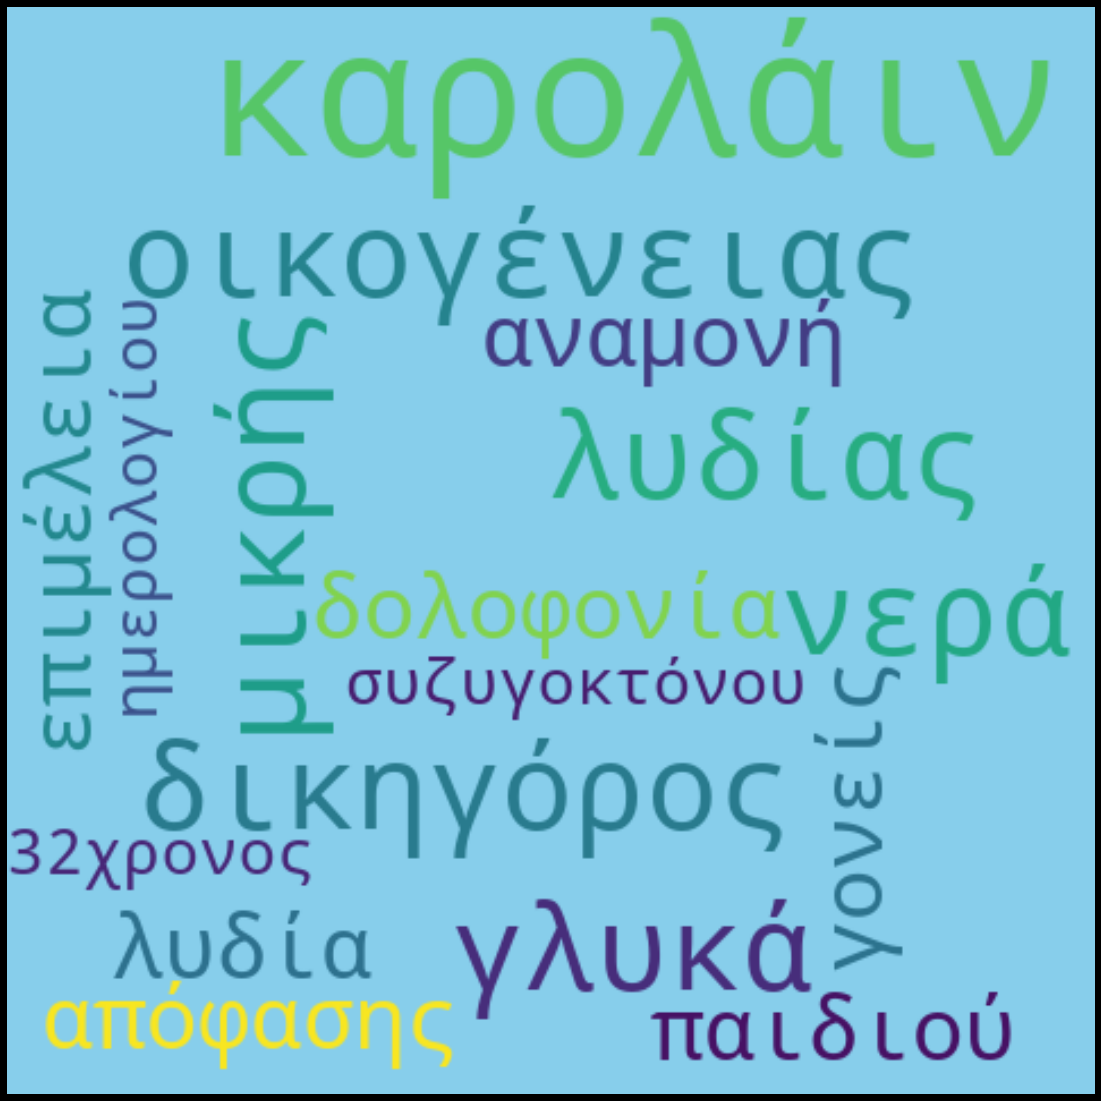

In [ ]:
# Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a list of word
text=("γλυκά νερά οικογένειας καρολάιν δικηγόρος  μικρής λυδίας  δολοφονία καρολάιν λυδία αναμονή απόφασης επιμέλεια παιδιού γονείς συζυγοκτόνου ημερολογίου καρολάιν 32χρονος")
fig = plt.figure(
    figsize = (40,20),
    facecolor = 'k',
    edgecolor = 'k')

# Create the wordcloud object
wordcloud = WordCloud(width=480, height=480,background_color="skyblue", margin=0).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

#Vectorizer & Cosine similarity

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
vec1 = np.array([[1,1,0,1,1]])
vec2 = np.array([[0,1,0,1,1]])
#print(cosine_similarity([vec1, vec2]))
print(cosine_similarity(vec1, vec2))



[[0.8660254]]


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words= nlp.Defaults.stop_words, max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(df['header'])  #finds the tfidf score with normalization

In [ ]:
results = pd.DataFrame(tfidf_matrix_train.toarray(), 
                       columns=tfidf_vectorizer.get_feature_names()) 
results.head()

,10,15χρονη,20χρονης,30,32χρονο,32χρονος,32χρονου,37,dna,άδεια,άκουγα,άτυχης,έγκλημα,έγραφε,έδειξαν,έκθεση,έλεγα,έμαθε,έπνιξε,έρευνα,έρευνες,έσπαγα,αίσθηση,αγκαλιά,αγόρασε,αδύνατο,αθήνα,αλόννησο,ανίκανος,αναγνωστόπουλο,αναγνωστόπουλος,αναζητά,ανακριτή,αναλάβει,αναλάβουν,αναμονή,αναστολές,ανατριχιαστική,ανατροφή,αναφορές,...,συζυγοκτόνος,συζυγοκτόνου,συζυκτόνου,συνάδελφο,συνήγορος,συνεργό,συνεχίζει,συνεχίζεται,συριζα,σφιχτά,σχέση,σύζυγος,σύλλογος,ταξίδι,τεχνικά,τιμωρηθεί,τιναζόταν,τρίτου,τραγικός,υπάρχει,υπήρχαν,υπεράσπισή,υπεράσπιση,υποστηρίζει,υποστηρίξει,υπόμνημα,φίλη,φρίκης,φυλακή,φωτιά,φωτογραφία,χρήματα,ψυχολόγο,ψυχολόγου,ψυχολόγων,όνομά,όχημα,ύποπτο,ύψιστης,ώρα
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.457932,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.277434,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.457932,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.496477,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.385303,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.384475,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train[0:1], tfidf_matrix_train))  #here the first element of tfidf_matrix_train is matched with other three elements

cosine scores ==>  [[1.         0.09486294 0.03467171 0.         0.         0.0463687
  0.0337041  0.18319255 0.0371131  0.         0.04810758 0.03688405
  0.04587097 0.         0.         0.         0.03354379 0.04946864
  0.05220724 0.09486563 0.         0.         0.14649021 0.
  0.04230799 0.11289311 0.16829288 0.12881788 0.16517691 0.04421882
  0.         0.04976674 0.         0.04405136 0.04093346 0.04372916
  0.03236171 0.06143539 0.11875296 0.04092225 0.03236171 0.0669715
  0.10125872 0.12281627 0.         0.03571439 0.03635004 0.09168842
  0.1429174  0.         0.03821939 0.08258823 0.         0.03421697
  0.03399757 0.04235403 0.04002815 0.04136096 0.08837587 0.0669715
  0.1120025  0.         0.02808987 0.03475592 0.         0.11931283
  0.03369567 0.0367083  0.03002874 0.10105432 0.03085669 0.
  0.03517793 1.         0.09486294 0.03467171 0.         0.
  0.0463687  0.0337041  0.18319255 0.0371131  0.         0.04810758
  0.03688405 0.04587097 0.         0.         0.        

In [ ]:
print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train, tfidf_matrix_train))  #here the first element of tfidf_matrix_train is matched with other three elements

cosine scores ==>  [[1.         0.09486294 0.03467171 ... 0.12881788 0.16517691 0.04421882]
 [0.09486294 1.         0.         ... 0.16404914 0.         0.04632452]
 [0.03467171 0.         1.         ... 0.03779365 0.04846096 0.03720561]
 ...
 [0.12881788 0.16404914 0.03779365 ... 1.         0.18004991 0.04820041]
 [0.16517691 0.         0.04846096 ... 0.18004991 1.         0.06180504]
 [0.04421882 0.04632452 0.03720561 ... 0.04820041 0.06180504 1.        ]]


In [ ]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)

In [ ]:
print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)) 


cosine scores ==>  [[1.         0.09486294 0.03467171 ... 0.12881788 0.16517691 0.04421882]
 [0.09486294 1.         0.         ... 0.16404914 0.         0.04632452]
 [0.03467171 0.         1.         ... 0.03779365 0.04846096 0.03720561]
 ...
 [0.12881788 0.16404914 0.03779365 ... 1.         0.18004991 0.04820041]
 [0.16517691 0.         0.04846096 ... 0.18004991 1.         0.06180504]
 [0.04421882 0.04632452 0.03720561 ... 0.04820041 0.06180504 1.        ]]


In [ ]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)

In [ ]:
similaritydf=pd.DataFrame(arr)

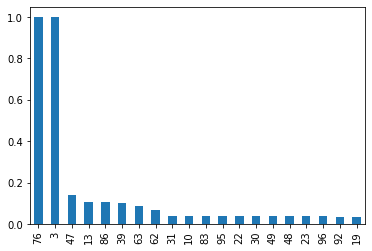

In [ ]:
pd.DataFrame(arr).loc[3].sort_values(ascending = False).head(20).plot(kind = 'bar')

In [ ]:
import seaborn as sns

#heatmap

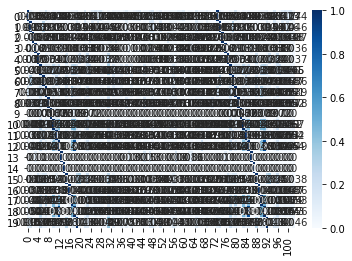

In [ ]:
sns.heatmap(similaritydf.head(20), fmt=".2g", cmap= "Blues", annot=True)

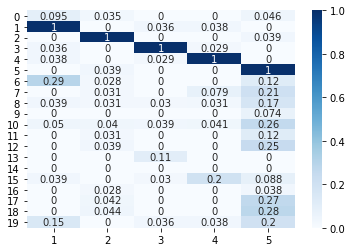

In [ ]:
sns.heatmap(similaritydf.head(20)[[1,2,3,4,5]], fmt=".2g", cmap= "Blues", annot=True)

In [ ]:
results.sum(axis =0).sort_values(ascending = False)

νερά            9.567430
γλυκά           9.567430
καρολάιν        7.509510
επιμέλεια       5.300890
συζυγοκτόνος    5.067237
                  ...   
κλίμα           0.363084
κακουργήματα    0.340003
αναστολές       0.340003
αντιμέτωπος     0.340003
πλημμελήματα    0.340003
Length: 291, dtype: float64

In [ ]:
sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False).head()

νερά            9.567430
γλυκά           9.567430
καρολάιν        7.509510
επιμέλεια       5.300890
συζυγοκτόνος    5.067237
dtype: float64

In [ ]:
results.sum(axis =0).sort_values(ascending = False)

νερά            9.567430
γλυκά           9.567430
καρολάιν        7.509510
επιμέλεια       5.300890
συζυγοκτόνος    5.067237
                  ...   
κλίμα           0.363084
κακουργήματα    0.340003
αναστολές       0.340003
αντιμέτωπος     0.340003
πλημμελήματα    0.340003
Length: 291, dtype: float64

In [ ]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, #ngram_range=(1, 2), 
                     vocabulary = ['νέα κρούσματα', 'covid 19']) #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(df['header'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

,νέα κρούσματα,covid 19
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [ ]:
sum_words.sort_values(ascending = False).head(17)

νερά            9.567430
γλυκά           9.567430
καρολάιν        7.509510
επιμέλεια       5.300890
συζυγοκτόνος    5.067237
λυδίας          4.912380
δολοφονία       4.244791
συζυγοκτόνου    3.911870
δικηγόρος       3.408296
μικρής          3.297621
οικογένειας     3.007466
πιλότος         2.547570
λέει            2.531435
λυδία           2.502299
απόφασης        2.440532
ζήτησε          2.331963
μητέρα          2.211214
dtype: float64

In [ ]:
most_common=sum_words.sort_values(ascending = False).head(16)

#γραφιμα συχνες λεξεις

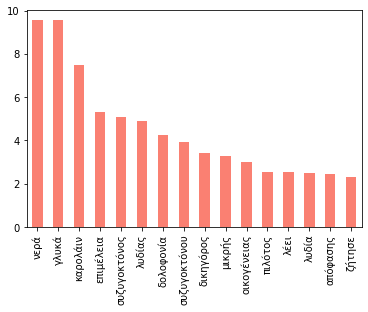

In [ ]:
most_common.plot(kind='bar',color='salmon')

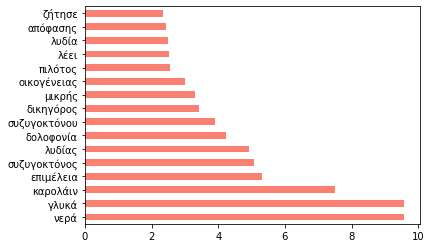

In [ ]:
most_common.plot(kind='barh',color='salmon')

In [ ]:
sum_words.sort_values(ascending = False).head(20)

νερά            9.567430
γλυκά           9.567430
καρολάιν        7.509510
επιμέλεια       5.300890
συζυγοκτόνος    5.067237
λυδίας          4.912380
δολοφονία       4.244791
συζυγοκτόνου    3.911870
δικηγόρος       3.408296
μικρής          3.297621
οικογένειας     3.007466
πιλότος         2.547570
λέει            2.531435
λυδία           2.502299
απόφασης        2.440532
ζήτησε          2.331963
μητέρα          2.211214
συζυγοκτόνο     2.094039
32χρονος        2.006064
αναμονή         1.934905
dtype: float64